### Problem Tanımı

- **Seçilen Veri Seti:** Student Performance
  - Bu veri seti, Portekiz'deki iki farklı derste (Matematik ve Portekizce) eğitim gören öğrencilerin demografik, sosyal ve okul ile ilgili bilgilerini içermektedir.
- **Problemin Amacı:** Öğrencilerin yıl sonu notlarını (G3) tahmin etmek.
- **İki veri kümesi:** student-mat.csv (Matematik) ve
student-por.csv (Portekizce)    
- **Birleştirildi:** df → Tüm öğrenciler + ders türü bilgisi
- **Hedef Değişken:** G3(Yıl sonu notu)
- **Problemin Amacı:**
Öğrencilerin yıl sonu başarı notu olan G3 değişkenini, diğer değişkenlere dayanarak tahmin etmeyi amaçlayan bir regresyon problemi ele alınmaktadır.
- **Pratikteki Önemi:**
   - Öğrencilerin düşük başarı risklerini önceden tahmin ederek eğitimde erken müdahale sağlanabilir.
   - Öğrencilerin başarısını etkileyen faktörleri analiz ederek öğretmen ve yöneticilere destek sağlar.
   - Eğitim politikaları ve kişiselleştirilmiş öğrenme planları geliştirilebilir.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_mat = pd.read_csv('/content/drive/MyDrive/student-mat.csv',  sep=';')
df_por = pd.read_csv('/content/drive/MyDrive/student-por.csv',  sep=';')

# Ders türü bilgisi ekle
df_mat['course'] = 'Math'
df_por['course'] = 'Portuguese'

# Birleştir
df = pd.concat([df_mat, df_por], ignore_index=True)

### Veri Analizi ve Görselleştirme


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,Portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,Portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,Portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,Portuguese


In [ ]:
# İlk 5 satırı görelim
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [ ]:
# Veri seti genel bilgileri
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
df.shape

(1044, 34)

 Veri Seti Yapısı
Toplam gözlem sayısı: 1044 öğrenci

Toplam özellik (sütun) sayısı: 34

16 tanesi sayısal, 18 tanesi kategorik veri türünde

In [ ]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course'],
      dtype='object')




| Değişken       | Açıklama                                                                                   |
| -------------- | ------------------------------------------------------------------------------------------ |
| **school**     | Öğrencinin okulu (ikili: "GP" veya "MS")                                                   |
| **sex**        | Öğrencinin cinsiyeti (ikili: "F" - kadın, "M" - erkek)                                     |
| **age**        | Öğrencinin yaşı (sayısal: 15 ile 22 arası)                                                 |
| **address**    | Öğrencinin ev adresi tipi (ikili: "U" - şehir, "R" - kırsal)                               |
| **famsize**    | Aile büyüklüğü (ikili: "LE3" - 3 veya daha az, "GT3" - 3'ten fazla)                        |
| **Pstatus**    | Ebeveynlerin birlikte yaşama durumu (ikili: "T" - birlikte, "A" - ayrı)                    |
| **Medu**       | Annenin eğitim düzeyi (0-4 arası; 0: yok, 1: ilkokul, 2: ortaokul, 3: lise, 4: üniversite) |
| **Fedu**       | Babanın eğitim düzeyi (0-4 arası; aynı Medu gibi)                                          |
| **Mjob**       | Annenin mesleği ("teacher", "health", "services", "at\_home", "other")                     |
| **Fjob**       | Babanın mesleği (aynı kategoriler)                                                         |
| **reason**     | Okul seçme nedeni ("home", "reputation", "course", "other")                                |
| **guardian**   | Yasal veli ("mother", "father", "other")                                                   |
| **traveltime** | Evden okula gidiş süresi (1: <15 dk, 2: 15-30 dk, 3: 30-60 dk, 4: >1 saat)                 |
| **studytime**  | Haftalık ders çalışma süresi (1: <2 saat, 2: 2-5 saat, 3: 5-10 saat, 4: >10 saat)          |
| **failures**   | Geçmiş sınıf tekrarı sayısı (1 ≤ n < 3 ise n, 3 veya üzeri ise 4)                          |
| **schoolsup**  | Okuldan ek eğitim desteği (yes/no)                                                         |
| **famsup**     | Aileden eğitim desteği (yes/no)                                                            |
| **paid**       | Ücretli ek ders alımı (yes/no)                                                             |
| **activities** | Ders dışı etkinliklere katılım (yes/no)                                                    |
| **nursery**    | Anaokuluna gitmiş olma durumu (yes/no)                                                     |
| **higher**     | Yüksek öğrenim isteği (yes/no)                                                             |
| **internet**   | Evde internet erişimi (yes/no)                                                             |
| **romantic**   | Romantik ilişki durumu (yes/no)                                                            |
| **famrel**     | Aile ilişkilerinin kalitesi (1: çok kötü, 5: çok iyi)                                      |
| **freetime**   | Okul sonrası serbest zaman (1-5 arası)                                                     |
| **goout**      | Arkadaşlarla dışarı çıkma sıklığı (1-5 arası)                                              |
| **Dalc**       | Hafta içi alkol tüketimi (1-5 arası)                                                       |
| **Walc**       | Hafta sonu alkol tüketimi (1-5 arası)                                                      |
| **health**     | Mevcut sağlık durumu (1: çok kötü, 5: çok iyi)                                             |
| **absences**   | Devamsızlık sayısı (0-93 arası)                                                            |
| **G1**         | 1. dönem notu                                                                              |
| **G2**         | 2. dönem notu                                                                              |
| **G3**         | 3. dönem (final) notu (**Hedef değişken**)                                                 |
| **course**     | Ders türü ("Math": Matematik, "Portuguese": Portekizce)                                    |


In [ ]:
# Sayısal sütunların özet istatistikleri
print(df.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

 Sayısal Değişkenler İçin Genel Değerler
G3 (Final Grade): Ortalama ≈ 11.34, Minimum: 0, Maksimum: 20

absences: Bazı öğrencilerde çok yüksek devamsızlık var (maks: 75). Bu aykırı değer olabilir.

G1 ve G2: G3 ile ilişkili ön notlar; ortalamaları ≈ 11 civarında.

In [ ]:
# Eksik veri var mı?
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64


In [ ]:
df['G3'].value_counts()

,count
G3,
10,153
11,151
13,113
12,103
14,90
15,82
8,67
9,63
0,53


### Görselleştirme

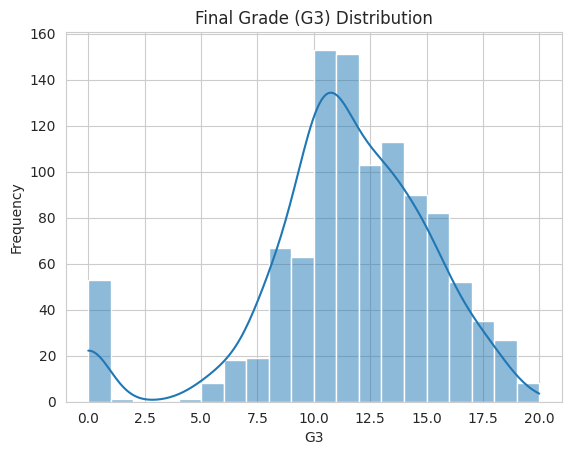

In [ ]:
# Hedef Değişken G3'ün Dağılımı:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Final Grade (G3) Distribution')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()

G3 dağılımı biraz sağa çarpık, yani düşük not alan öğrenciler az da olsa var. Çoğunluk 10-15 aralığında toplanmış.

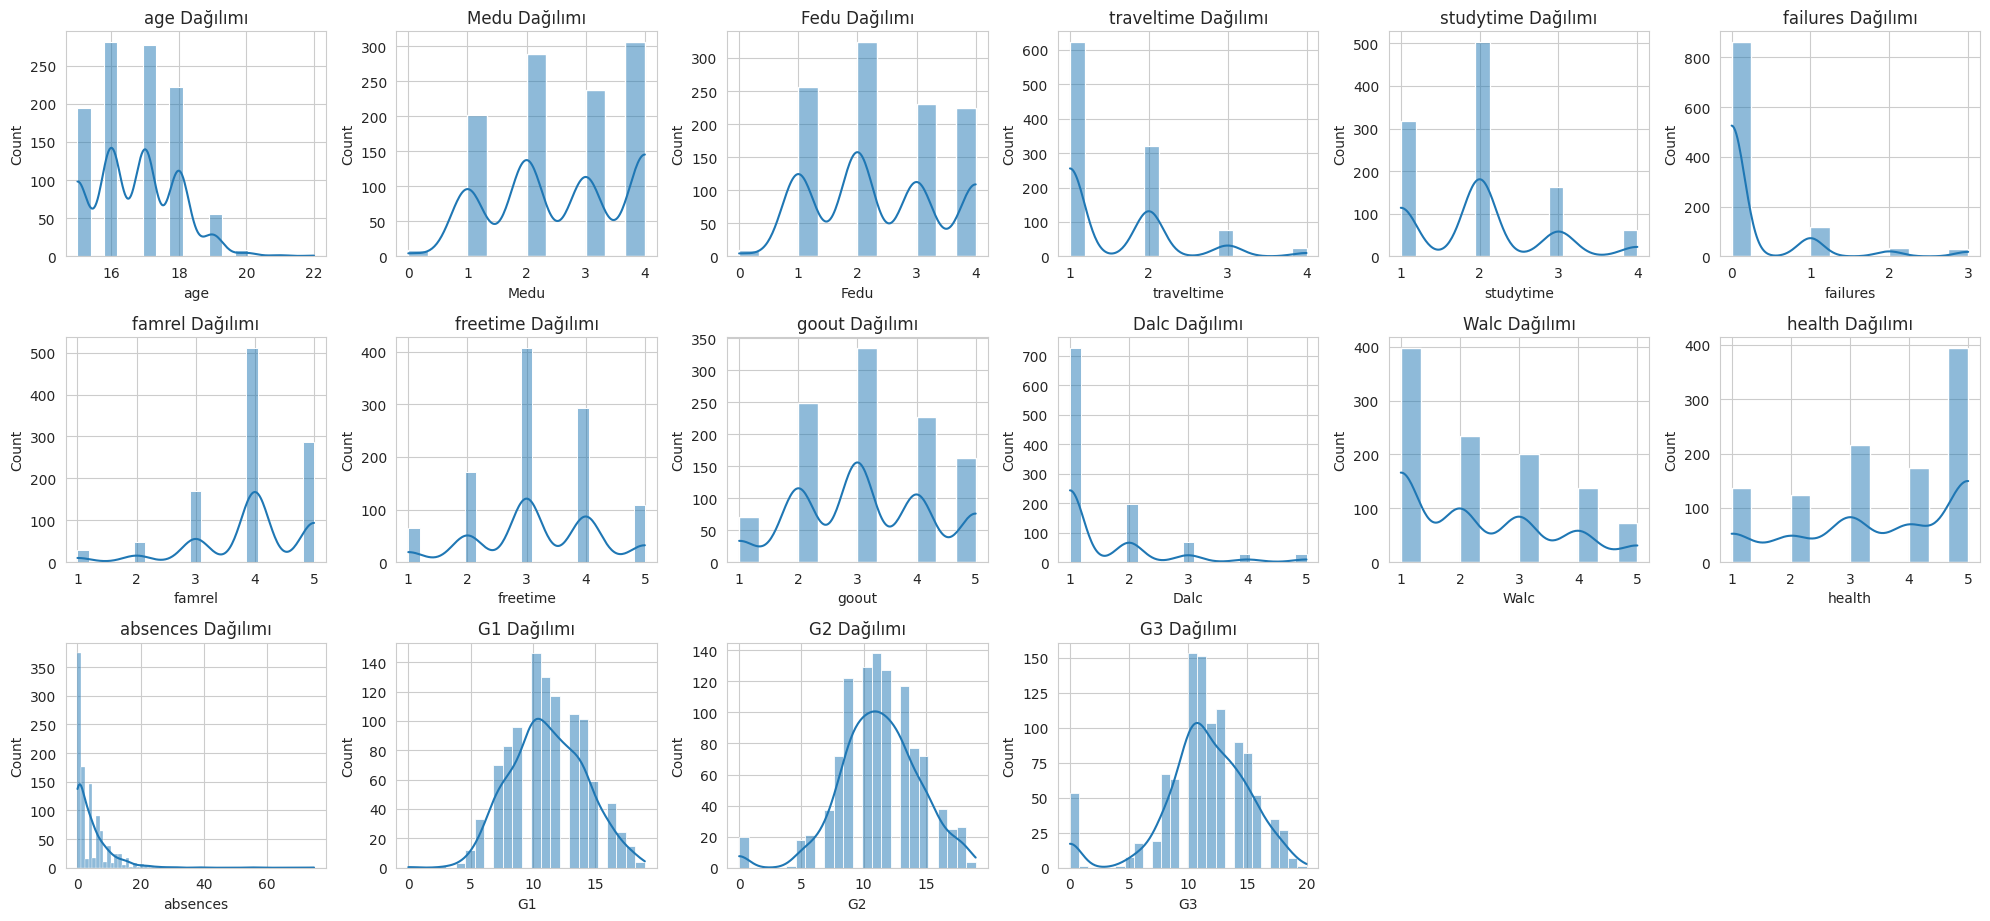

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunları al
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Grafik boyutu
plt.figure(figsize=(20, 15))

# Her sütun için histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)  # 5 satır, 6 sütun şeklinde alt grafikler
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Dağılımı')

plt.tight_layout()
plt.show()


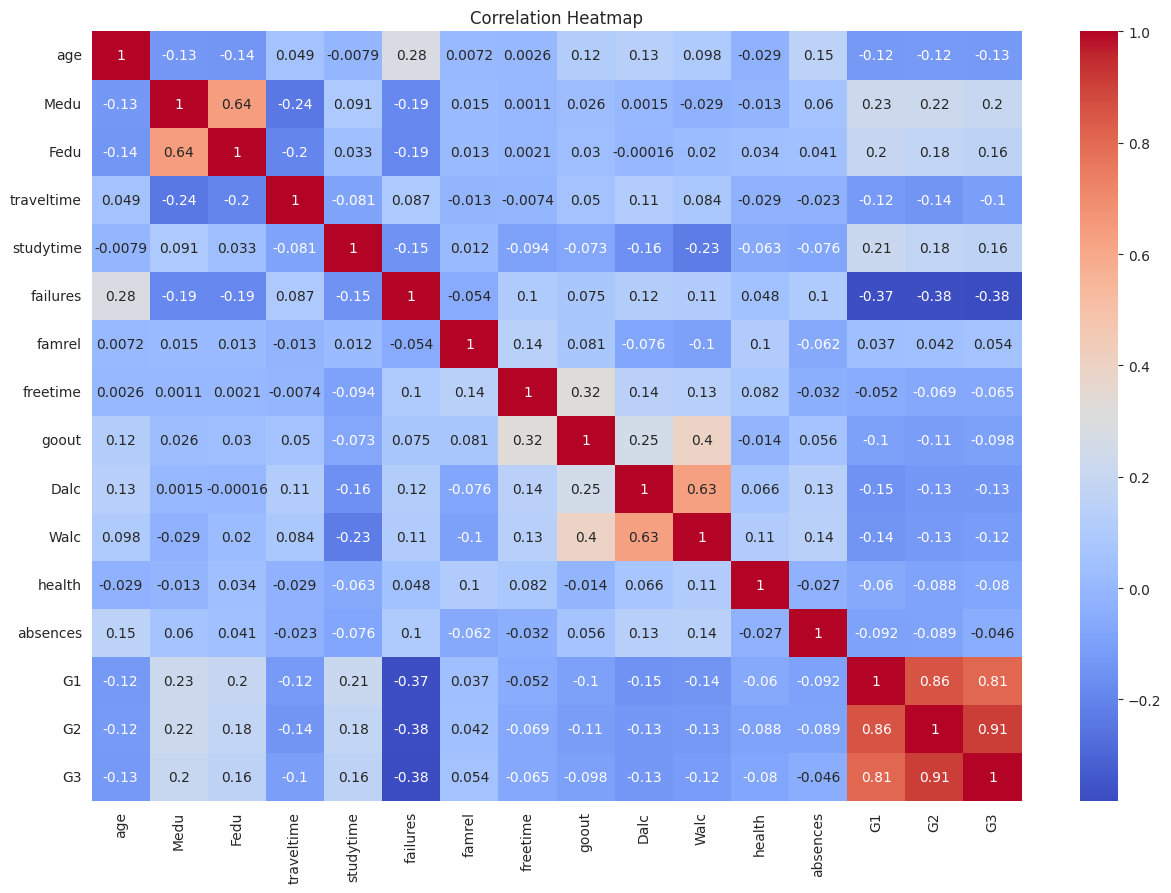

In [ ]:
#Korelasyon Heatmap’i (Sayısal Değişkenler Arası İlişki):
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Korelasyon Isı Haritasının Özeti** :
- **Pozitif Korelasyonlar** :
 - G1, G2 ve G3: Bu özellikler arasında güçlü pozitif korelasyonlar var ve bu da üç dönem boyunca öğrencilerin notlarında yüksek bir tutarlılık olduğunu gösteriyor (örneğin, G1 ↔ G2 = 0,86, G2 ↔ G3 = 0,92, G1 ↔ G3 = 0,83).
 - Ebeveyn Eğitimi (Medu, Fedu): Ebeveynlerin eğitim düzeyleri ile final notları (G3) arasında pozitif korelasyon vardır; Medu ↔ G3 = 0,24 ve Fedu ↔ G3 = 0,21.
 -Çalışma Süresi: Final notlarıyla hafif pozitif korelasyon (çalışma süresi ↔ G3 = 0,25).
- **Negatif Korelasyonlar** :
 - Başarısızlıklar: Notlarla güçlü negatif korelasyon, daha yüksek başarısızlıkların performansı düşürdüğünü gösteriyor (başarısızlıklar ↔ G3 = -0,39).
 -Devamsızlıklar: Notlarla zayıf negatif korelasyon (devamsızlıklar ↔ G3 = -0,09).
 -Alkol Tüketimi:
Hafta içi (Dalc): Notlarla zayıf negatif korelasyon (Dalc ↔ G3 = -0,20).
Hafta sonu (Walc): Benzer zayıf negatif korelasyon (Walc ↔ G3 = -0,18).

- **Görüşler** :
 - Başarısızlıklar notlar üzerinde en büyük olumsuz etkiye sahipken, ebeveyn eğitimi ve çalışma süresi performansı olumlu etkiliyor.
 -Alkol tüketimi, devamsızlık ve boş zaman aktiviteleri (örneğin dışarı çıkma) gibi sosyal ve yaşam tarzı faktörlerinin akademik performansla daha zayıf ancak dikkat çekici olumsuz ilişkileri vardır.
 -G1, G2 ve G3'te tutarlı notlara sahip öğrencilerin, yüksek korelasyonlarından da anlaşılacağı üzere, istikrarlı bir performans sergiledikleri muhtemeldir.

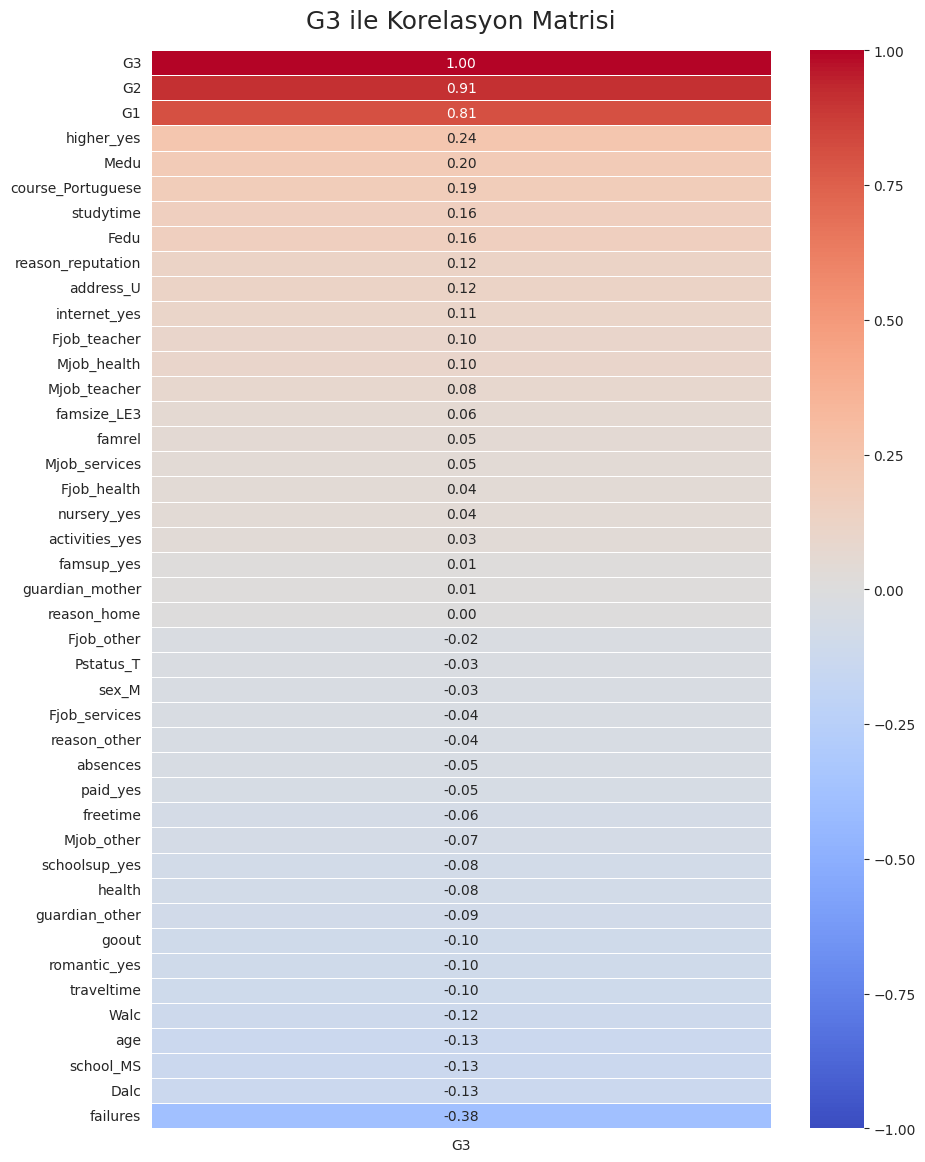

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi
# Use the encoded DataFrame to calculate the correlation matrix
corr_matrix = df_encoded.corr()

# G3 ile korelasyonları alalım ve sıralayalım
target_corr = corr_matrix[['G3']].sort_values(by='G3', ascending=False)

# Isı haritasını çizelim
plt.figure(figsize=(10, 14))
heatmap = sns.heatmap(
    target_corr,
    vmin=-1, vmax=1,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
heatmap.set_title('G3 ile Korelasyon Matrisi', fontdict={'fontsize':18}, pad=16)
plt.show()

 Önemli Korelasyonlar:
G3 ile en yüksek korelasyon:

G2: 0.91 → Yıl ortası notları final notunu çok güçlü etkiliyor.

G1: 0.81

failures değişkeni ile negatif korelasyon var (-0.38) → Ders tekrarı başarısızlığı artırıyor.

absences (devamsızlık) ile çok düşük negatif korelasyon var (≈ -0.05).

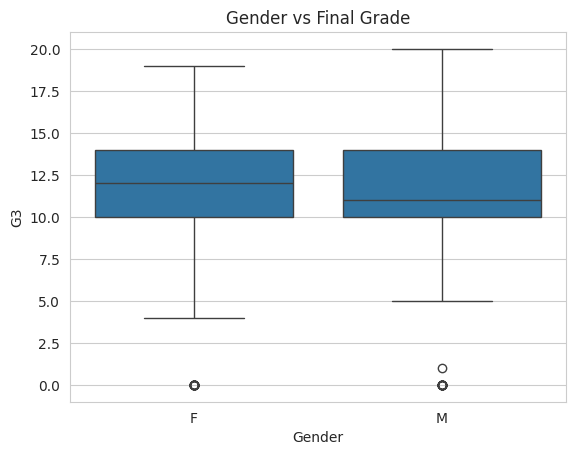

In [ ]:
#Cinsiyete Göre Final Notu (Boxplot)
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Gender vs Final Grade')
plt.xlabel('Gender')
plt.ylabel('G3')
plt.show()

Gender vs G3 (Cinsiyet ve Final Notu)
Erkek (M) ve Kadın (F) öğrenciler arasında belirgin bir fark yok.

Her iki grupta da geniş bir dağılım mevcut.

Outlier (aykırı) değerler her iki grupta da görülüyor.

Kategorik Değişkenler İçin G3 Boxplot’ları:

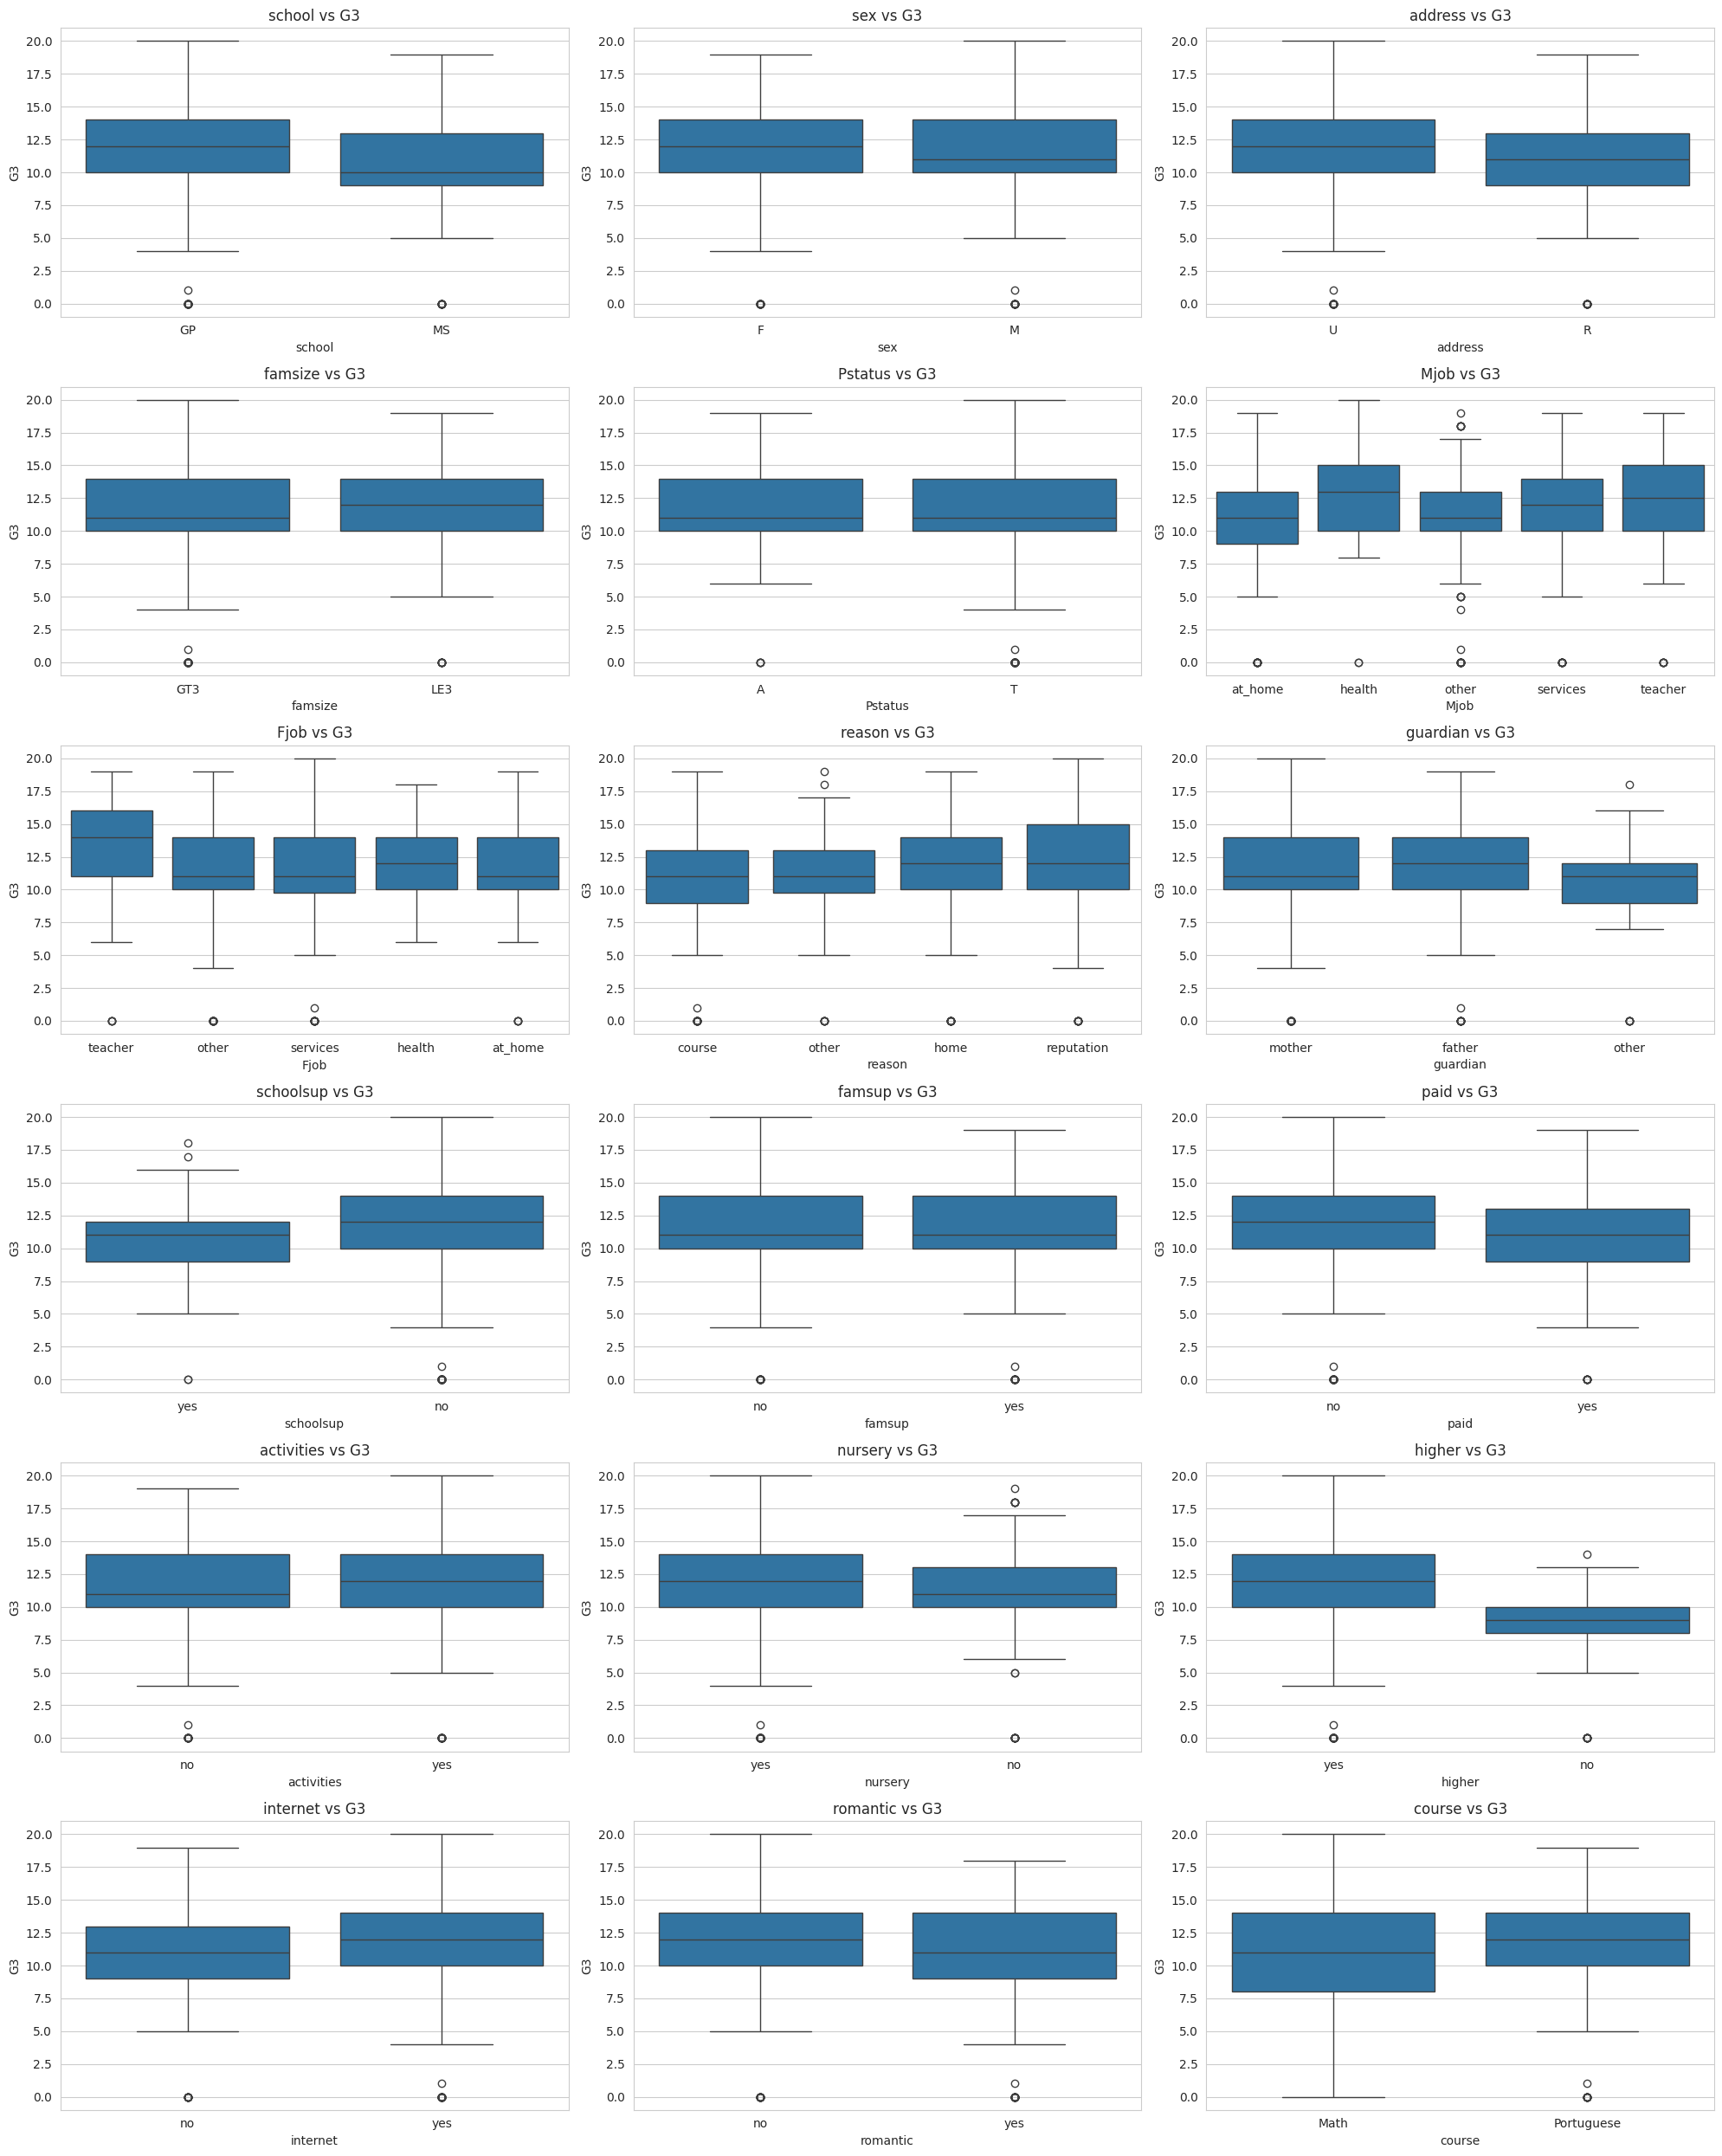

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik sütunları seçelim
categorical_cols = df.select_dtypes(include='int64').columns.tolist()

# G3'ü ve sayısal değişkenleri hariç tutmak için manuel liste kullanabiliriz:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'course']

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'{col} vs G3')
    plt.xlabel(col)
    plt.ylabel('G3')

plt.tight_layout()
plt.show()


Course Type vs G3 (Ders Türü ve Final Notu)
Matematik (Math) ve Portekizce (Portuguese) dersleri arasında çok büyük bir fark yok ama Matematik’te minimum not daha düşük.

Ancak Matematik dersinde minimum G3 daha düşük → belki Matematik'te başarısızlık riski biraz daha yüksek olabilir.

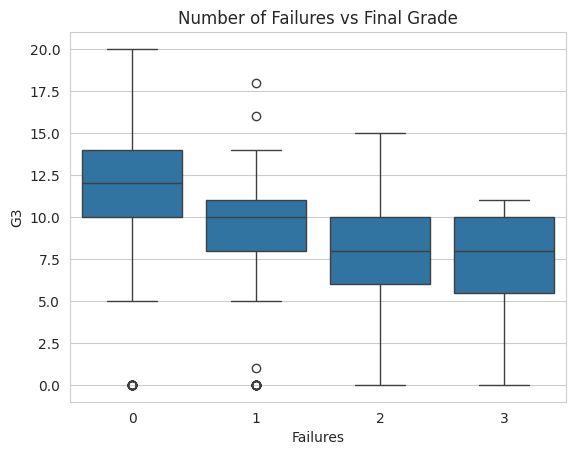

In [ ]:
#Başarı Durumu ile Final Notu İlişkisi
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Number of Failures vs Final Grade')
plt.xlabel('Failures')
plt.ylabel('G3')
plt.show()

Daha fazla dersten kalan öğrenciler genellikle düşük G3 notuna sahip.

İnternet erişimi olan öğrencilerde not ortalaması biraz daha yüksek olabilir. (Ama fark küçük.)

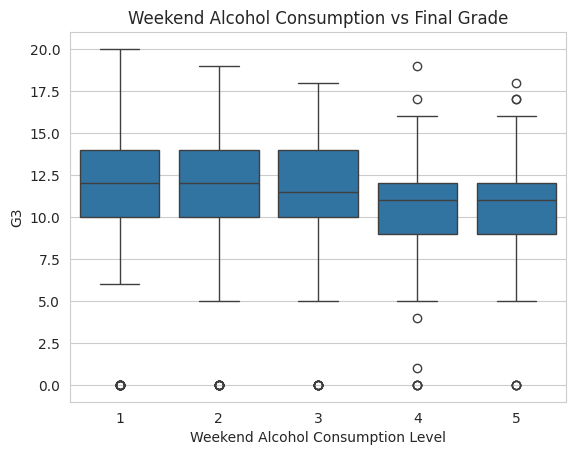

In [ ]:
#Aylık Alkol Kullanımı ile Başarı Durumu (Walc)
sns.boxplot(x='Walc', y='G3', data=df)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.xlabel('Weekend Alcohol Consumption Level')
plt.ylabel('G3')
plt.show()

alkol tüketimi arttıkça genel olarak not ortalaması azalıyor

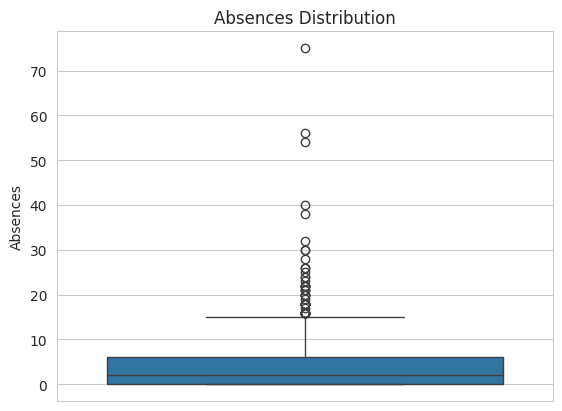

In [ ]:
#Devamsızlık (absences) Dağılımı + Aykırı Değerler
sns.boxplot(y='absences', data=df)
plt.title('Absences Distribution')
plt.ylabel('Absences')
plt.show()

Absences değişkeninde aykırı değerler var (örneğin 40, 75 gibi yüksek devamsızlıklar).

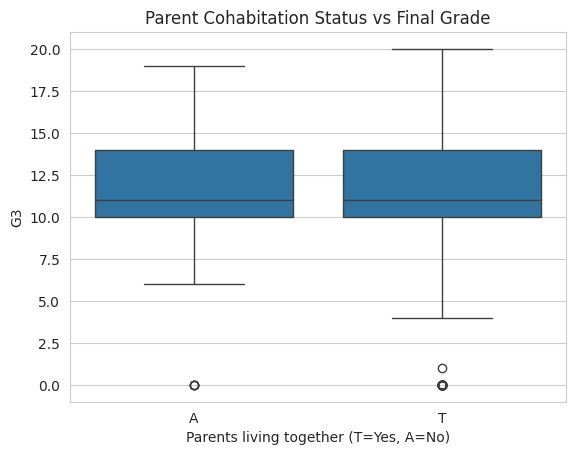

In [ ]:
#Parent Status (Pstatus) Etkisi
sns.boxplot(x='Pstatus', y='G3', data=df)
plt.title('Parent Cohabitation Status vs Final Grade')
plt.xlabel('Parents living together (T=Yes, A=No)')
plt.ylabel('G3')
plt.show()


Ebeveynleri birlikte olan ve olmayan öğrenciler arasında bariz fark görünmüyor ama biraz daha analiz yapılabilir.

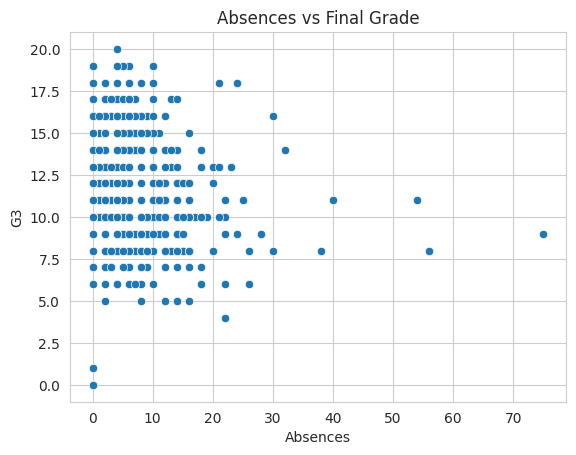

In [ ]:
#scatterplot: absences vs G3
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Absences vs Final Grade')
plt.xlabel('Absences')
plt.ylabel('G3')
plt.show()


Grafiğin sağ tarafında, çok yüksek devamsızlık sayılarına sahip (örneğin 40, 60, 75 gibi) birkaç öğrenci var. Bu öğrenciler genellikle düşük notlara sahip, ancak bu yüksek devamsızlıkların not üzerindeki etkisini daha net anlamak için bu aykırı değerleri ayrıca incelemek faydalı olabilir.

<Axes: xlabel='age', ylabel='Count'>

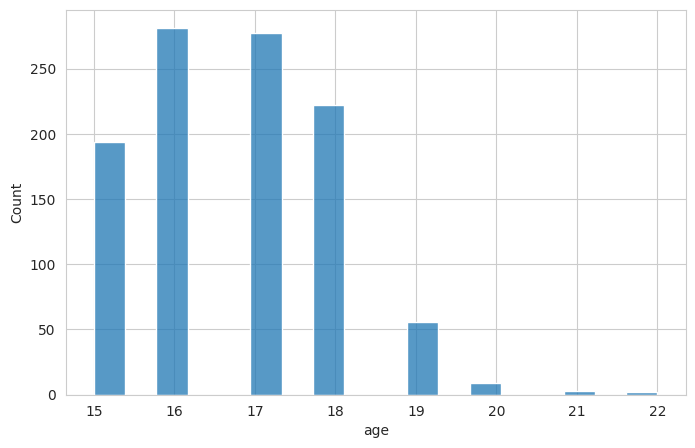

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="age",data=df)

Histograma baktığımızda şunları yorumlayabiliriz:

**En Yoğun Yaş Grubu:** Grafikte en yüksek çubuk 16 yaşa denk geliyor. Bu, veri setindeki öğrencilerin en büyük kısmının 16 yaşında olduğunu gösteriyor.

**Dağılım:** Yaş dağılımı genel olarak 15 ile 18 yaş aralığında yoğunlaşmış durumda. Öğrencilerin büyük çoğunluğu lise çağındadır.

**Daha Az Sayıdaki Öğrenciler:** 18 yaşından büyük öğrencilerin sayısı (19, 20, 21, 22 yaş) daha azdır ve bu yaş grupları histogramın sağ tarafında daha kısa çubuklarla temsil edilmiştir.

**Minimum ve Maksimum Yaş:** Grafikteki eksenlerden ve daha önce aldığımız describe() çıktısından da bildiğimiz gibi, öğrencilerin minimum yaşı 15, maksimum yaşı ise 22'dir.

**Özetle,** histogram bize veri setindeki öğrencilerin yaşlarının çoğunlukla 15-18 yaş aralığında toplandığını ve en kalabalık yaş grubunun 16 olduğunu net bir şekilde göstermektedir.

<Axes: xlabel='sex', ylabel='count'>

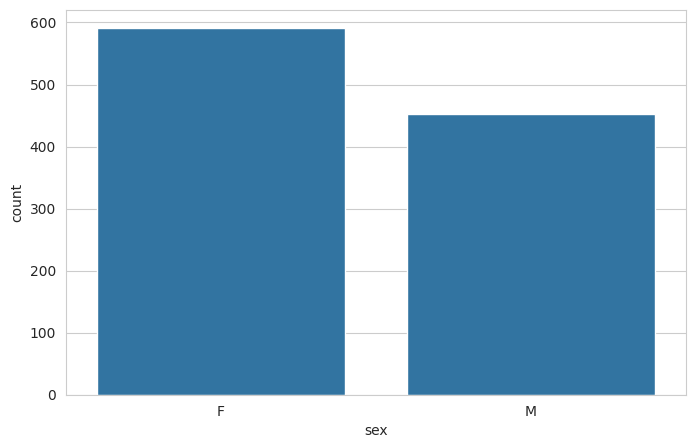

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "sex",data=df)

<Axes: xlabel='Medu', ylabel='count'>

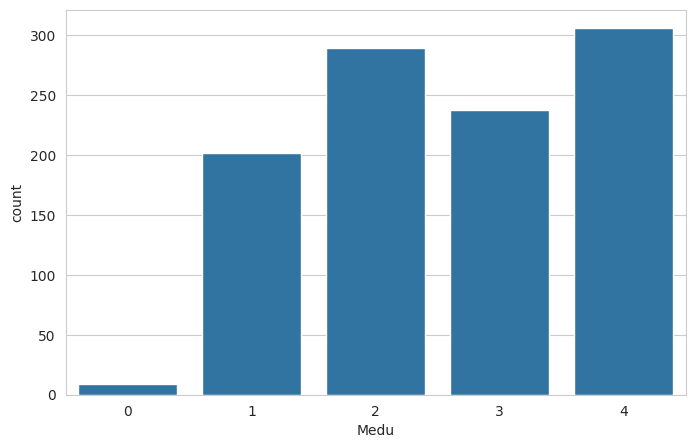

In [ ]:
#öğrencilerin annelerinin eğitim düzeyi
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Medu",data=df)

**0: yok, 1: ilkokul, 2: 5-9. sınıf, 3: lise, 4: üniversite veya üzeri**
veri setindeki annelerin eğitim düzeylerinin çoğunlukla yüksek seviyelerde (özellikle üniversite veya üzeri) toplandığını ve daha düşük eğitim seviyelerine sahip anne sayısının daha az olduğunu göstermektedir. Bu dağılım, öğrenci başarıları ile anne eğitim düzeyi arasındaki potansiyel ilişkiyi incelerken faydalı bir başlangıç noktasıdır.

<Axes: xlabel='Fedu', ylabel='count'>

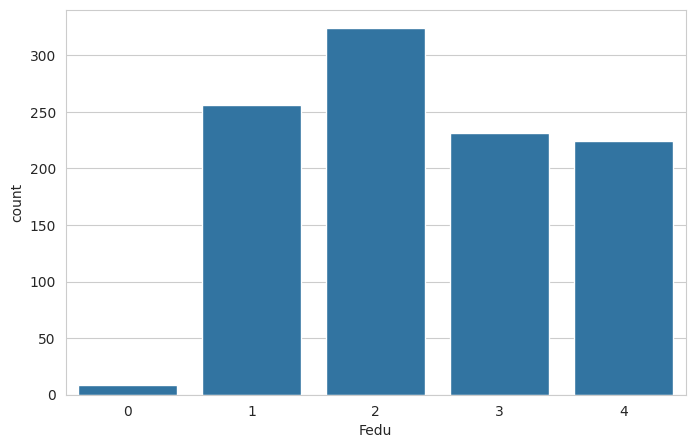

In [ ]:
#öğrencilerin babalarının eğitim düzeyi
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Fedu",data=df)

<Axes: xlabel='G1', ylabel='Count'>

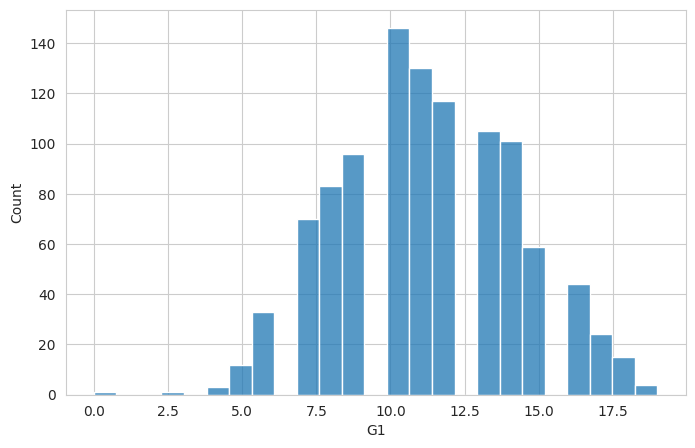

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G1",data=df)

Bu görsel, veri setindeki öğrencilerin 1. dönem notlarının (G1) dağılımını gösteren bir histogramdır. G1 notları 0 ile 19 arasında değişmektedir (describe çıktısında max değerin 19 olduğunu görmüştük).

Grafiğe baktığımızda şunları yorumlayabiliriz:

- Merkez Eğilim: Notların çoğunlukla 10-12 aralığında toplandığını görüyoruz. Bu, öğrencilerin 1. dönem notlarının ortalamanın etrafında yoğunlaştığını gösterir.

- Dağılım: Dağılım genel olarak simetriğe yakın görünmekle birlikte, sol tarafa (düşük notlara) doğru hafif bir yığılma olabilir.
Düşük Notlar: 0-5 aralığında da öğrencilerin olduğu görülüyor, ancak bu notları alan öğrencilerin sayısı daha azdır.
Yüksek Notlar: 15 ve üzeri not alan öğrenci sayısı da, 10-12 aralığına göre daha düşüktür.

- Özetle, bu histogram bize öğrencilerin 1. dönem notlarının genellikle orta seviyelerde (10-12 civarı) toplandığını, düşük ve yüksek not alan öğrenci sayısının daha az olduğunu göstermektedir. Bu dağılım, final notu (G3) ile yüksek korelasyona sahip olan G1 değişkeninin genel görünümünü sunar.

<Axes: xlabel='G2', ylabel='Count'>

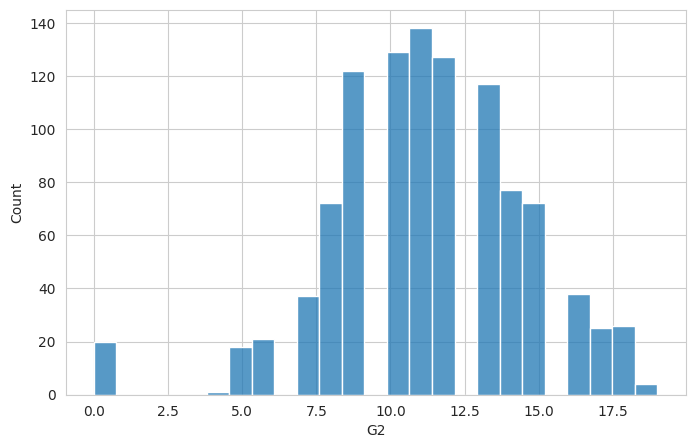

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G2",data=df)

Bu görsel, veri setindeki öğrencilerin 2. dönem notlarının (G2) dağılımını gösteren bir histogramdır. G2 notları da 0 ile 19 arasında

**Grafiğe baktığımızda şunları yorumlayabiliriz:**

- **G1'e Benzer Dağılım:** G2 notlarının dağılımı, G1 notlarının dağılımına oldukça benzemektedir. Notların çoğunlukla 10-12 aralığında toplandığını görmekteyiz.

- **Merkez Eğilim ve Yoğunluk:** Tıpkı G1'de olduğu gibi, öğrenciler 2. dönemde de notlarını genellikle orta seviyelerde almıştır.

- **Düşük ve Yüksek Notlar:** Düşük not alan (G2 değeri 0-5 arası) ve yüksek not alan (G2 değeri 15 ve üzeri) öğrenci sayısı, orta seviye not alan öğrenci sayısına göre daha azdır.

- **Korelasyonun Yansıması:** G2'nin G3 ile çok yüksek bir korelasyonu (0.91) olduğunu biliyoruz. Bu histogram, G2 notlarının final notuna (G3) benzer bir dağılıma sahip olabileceğini düşündürüyor, bu da aralarındaki güçlü ilişkiyi destekler.

**Özetle,** G2 notlarının dağılımı G1 notlarına benzer bir şekilde orta seviyelerde yoğunlaşmıştır. Bu görsel, final notunu tahmin etmede en önemli değişkenlerden biri olan G2'nin genel dağılımını anlamamıza yardımcı olur.

<Axes: xlabel='G3', ylabel='Count'>

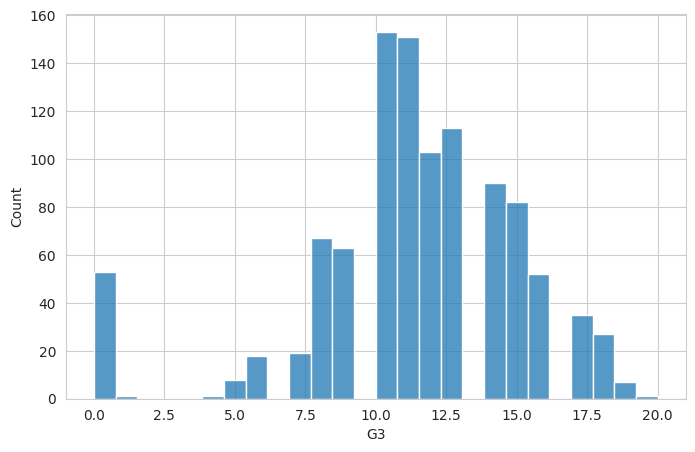

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(x="G3",data=df)

- **Bu görsel, veri setindeki öğrencilerin final notlarının (G3) dağılımını gösteren bir histogramdır.** G3 notları 0 ile 20 arasında değişmektedir (describe çıktınızda min 0, max 20 olduğunu görmüştük).

Grafiğe baktığımızda şunları yorumlayabiliriz:

- **Genel Dağılım:** Notların çoğunlukla 10-15 aralığında toplandığını görüyoruz. Bu aralıkta en yüksek yığılma mevcuttur.

- **Düşük Notlar:** 0 not alan önemli sayıda öğrenci bulunmaktadır. Bu, başarısız olan (ya da sınava girmeyen/değerlendirilmeye alınmayan) bir grup öğrenci olduğunu gösterir. Daha düşük not aralıklarında (örneğin 1-5 arası) öğrenci sayısı daha azdır.

- **Yüksek Notlar:** 15 ve üzeri not alan öğrenci sayısı, orta not alan öğrencilere göre daha düşüktür, ancak yine de belirgin bir sayıdadır. 20 tam not alan öğrenciler de mevcuttur.

- **Çarpıklık:** Dağılım, 0'daki yığılma nedeniyle hafif sola (düşük notlara) doğru çarpık görünmektedir.

Özetle, bu histogram bize öğrencilerin final notlarının çoğunlukla orta-üst seviyelerde (10-15 arası) toplandığını, ancak dikkate değer sayıda başarısız öğrenci olduğunu göstermektedir. Bu dağılım, modelimizin tahmin etmeye çalışacağı hedef değişkenin genel yapısını anlamamız açısından önemlidir.

###Veri Ön İşleme

LabelEncoder ile Kategorik Değişkenlerin Sayısallaştırılması

In [ ]:
# 1. Kategorik değişkenleri bul
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Kategorik sütunlar:", categorical_cols)

Kategorik sütunlar: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'course']


In [ ]:
# 2. LabelEncoder nesnesi oluştur
le = LabelEncoder()

# 3. Her kategorik sütunu Label Encoding ile sayısala çevir
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  course  
0         3      4     1     1       3         6   5   6   6       0  
1         3      3     1     1       3         4   5   5   6       0  
2         3      2     2     3       3        10   7   8  10       0  
3         2      2     1     1       5         2  15  14  15       0  
4         3      2     1     2       5         4   6  10  10       0  

[5 rows x 34 columns]


StandardScaler ile Sayısal Sütunları Ölçekleme (G3 hariç)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Hedef değişken hariç tüm sayısal sütunları seç
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('G3')  # G3 hedef olduğu için ölçeklemiyoruz

# 2. Ölçekleyici nesne
scaler = StandardScaler()

# 3. Ölçekleme işlemi
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Kontrol: İlk 5 satırı görelim
print(df.head())



     school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.593575 -0.875498  1.027889  0.612776 -0.643921 -2.761901  1.242077   
1 -0.593575 -0.875498  0.221035  0.612776 -0.643921  0.362069 -1.426089   
2 -0.593575 -0.875498 -1.392674  0.612776  1.552986  0.362069 -1.426089   
3 -0.593575 -0.875498 -1.392674  0.612776 -0.643921  0.362069  1.242077   
4 -0.593575 -0.875498 -0.585820  0.612776 -0.643921  0.362069  0.352689   

       Fedu      Mjob      Fjob  ...  freetime     goout      Dalc      Walc  \
0  1.466302 -1.629761  2.031994  ... -0.195099  0.732511 -0.542374 -0.999995   
1 -1.262431 -1.629761 -0.285212  ... -0.195099 -0.135527 -0.542374 -0.999995   
2 -1.262431 -1.629761 -0.285212  ... -0.195099 -1.003566  0.554987  0.557044   
3 -0.352853 -0.826043  0.873391  ... -1.165019 -1.003566 -0.542374 -0.999995   
4  0.556724 -0.022325 -0.285212  ... -0.195099 -1.003566 -0.542374 -0.221475   

     health  absences        G1        G2  G3   course  
0 -0.381387

| Amaç                                       | İşlem                             |
| ------------------------------------------ | --------------------------------- |
| Metinleri sayıya çevirmek                  | `LabelEncoder`                    |
| Sayısal veriyi normalize etmek             | `StandardScaler`                  |
| Modelin veriyi doğru algılamasını sağlamak | **İkisini birlikte kullanıyoruz** |


| Sütun      | Açıklama                   |
| ---------- | -------------------------- |
| age        | Öğrencinin yaşı            |
| absences   | Devamsızlık sayısı         |
| G1         | 1. dönem notu              |
| G2         | 2. dönem notu              |
| traveltime | Okula gitme süresi         |
| studytime  | Ders çalışma süresi        |
| failures   | Kaldığı ders sayısı        |
| freetime   | Boş vakit                  |
| goout      | Dışarı çıkma sıklığı       |
| Dalc       | Hafta içi alkol kullanımı  |
| Walc       | Hafta sonu alkol kullanımı |
| health     | Sağlık durumu              |
| famrel     | Aile ilişkileri            |


###  EĞİTİM / TEST AYRIMI (train_test_split)

Amaç : Model değerlendirmesi için veri setini eğitim ve test setlerine ayırmak.

G3'ün (Final Notu) hedef olduğu özellikler (X) ve hedef değişken (y) ayrıldı.

Eğitim ve test setleri oluşturmak için sklearn'den train_test_split kullanıldı.

Verilerin %20'sini test için ayırdım ve rastgele bir başlangıç ​​noktası (random_state=123) belirleyerek tekrarlanabilirliği sağladım.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Hedef değişken (y) - Yıl sonu notu G3
y = df['G3']

# 2. Özellikler (X) - G3 dışındaki tüm değişkenler (G1 ve G2 dahil)
X = df.drop(['G3'], axis=1)

# 3. Eğitim ve test setlerine ayır (Eğitim %80, Test %20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

# 4. Boyut kontrolü yapalım
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)



Eğitim veri seti boyutu: (835, 33)
Test veri seti boyutu: (209, 33)


## MODEL KURMA

####🔹 Basit Linear Regression Modeli

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_lr = lr_model.predict(X_test)

# Performans metriklerini hesapla
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Sonuçları bir sözlükte topla
lr_results = {
    "Model": "Linear Regression",
    "MAE": mae_lr,
    "MSE": mse_lr,
    "RMSE": rmse_lr,
    "R2": r2_lr
}

# Sözlüğü yazdır
print("Linear Regression Performansı:")
for metric, value in lr_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")


Linear Regression Performansı:
Model: Linear Regression
MAE: 0.917
MSE: 1.856
RMSE: 1.363
R2: 0.872


####🔹Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Performans metriklerini hesapla
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Sonuçları bir sözlükte topla
rf_results = {
    "Model": "Random Forest",
    "MAE": mae_rf,
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "R2": r2_rf
}

# Yazdır
print("Random Forest Performansı:")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Random Forest Performansı:
Model: Random Forest
MAE: 0.971
MSE: 2.711
RMSE: 1.647
R2: 0.812


####🔹XGBoost Regressor


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Performans metrikleri
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Sonuçları sözlükte topla
xgb_results = {
    "Model": "XGBoost",
    "MAE": mae_xgb,
    "MSE": mse_xgb,
    "RMSE": rmse_xgb,
    "R2": r2_xgb
}

# Yazdır
print("XGBoost Performansı:")
for metric, value in xgb_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



XGBoost Performansı:
Model: XGBoost
MAE: 1.036
MSE: 2.738
RMSE: 1.655
R2: 0.811


####🔹Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit (random_state kaldırıldı)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Tahmin yap
y_pred_ridge = ridge_model.predict(X_test)

# Performans metrikleri
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Sonuçları sözlükte topla
ridge_results = {
    "Model": "Ridge Regression",
    "MAE": mae_ridge,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "R2": r2_ridge
}

# Yazdır
print("Ridge Regression Performansı:")
for metric, value in ridge_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Ridge Regression Performansı:
Model: Ridge Regression
MAE: 0.916
MSE: 1.855
RMSE: 1.362
R2: 0.872


Random Forest, hem hata metriklerinde hem R²’de en iyi sonucu verdi.

XGBoost iyi ama Random Forest kadar değil.

Linear ve Ridge Regression ise daha düşük performans gösterdi, çünkü doğrusal modeller.

CatBoostRegressor

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modeli oluştur ve eğit
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)  # verbose=0 çıktı baskısını kapatır
catboost_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_catboost = catboost_model.predict(X_test)

# Performans metriklerini hesapla
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

# Sonuçları bir sözlükte topla
catboost_results = {
    "Model": "CatBoost Regressor",
    "MAE": mae_catboost,
    "MSE": mse_catboost,
    "RMSE": rmse_catboost,
    "R2": r2_catboost
}

# Sözlüğü yazdır
print("CatBoost Regressor Performansı:")
for metric, value in catboost_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")


CatBoost Regressor Performansı:
Model: CatBoost Regressor
MAE: 0.911
MSE: 2.078
RMSE: 1.441
R2: 0.856


#### ***GridSearchCV ile Random Forest Hiperparametre Optimizasyonu***

* Modelin performansını artırmak için parametreleri otomatik olarak deneyip en iyisini seçen yöntem.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model
rf = RandomForestRegressor(random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# Eğit
grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)

# En iyi model
best_rf = grid_search.best_estimator_

# Tahmin yap
y_pred_best_rf = best_rf.predict(X_test)

# Performans metrikleri
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
mse_best = mean_squared_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best_rf)

# Sonuçları sözlükte topla
best_rf_results = {
    "Model": "Optimized Random Forest",
    "MAE": mae_best,
    "MSE": mse_best,
    "RMSE": rmse_best,
    "R2": r2_best
}

# Yazdır
print("Optimized Random Forest Performansı:")
for metric, value in best_rf_results.items():
    print(f"{metric}: {value:.3f}" if isinstance(value, float) else f"{metric}: {value}")



Fitting 3 folds for each of 16 candidates, totalling 48 fits
En iyi parametreler: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Performansı:
Model: Optimized Random Forest
MAE: 0.931
MSE: 2.369
RMSE: 1.539
R2: 0.836


| **Parametre**       | **Seçilen Değer** |
| ------------------- | ----------------- |
| `n_estimators`      | 200               |
| `max_depth`         | 10                |
| `min_samples_split` | 2                 |
| `min_samples_leaf`  | 2                 |
| `max_features`      | None              |


In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


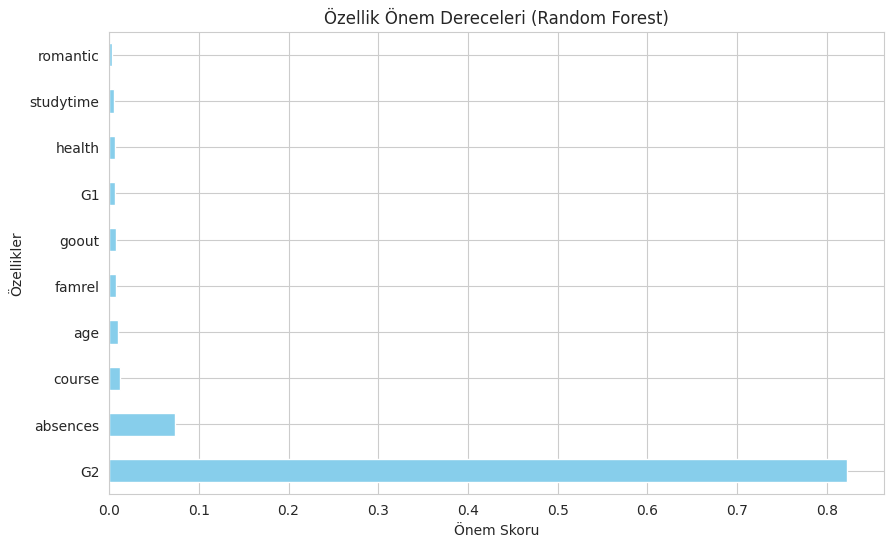

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Özellik isimleri ve önemleri
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# En önemli 10 özelliği bar grafikte göster
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Özellik Önem Dereceleri (Random Forest)')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellikler')
plt.show()


In [ ]:
import pandas as pd

# Diğer modellerin sonuçları zaten sözlüklerde toplanmış olsun:
# lr_results, rf_results, xgb_results, ridge_results, catboost_results

# Optimize Random Forest sonuçlarını ekleyelim
optimized_rf_results = {
    "Model": "Optimized Random Forest",
    "MAE": 0.931,
    "MSE": 2.369,
    "RMSE": 1.539,
    "R2": 0.836
}

# Tüm sonuçları listeye ekle
all_results = [lr_results, ridge_results, rf_results, optimized_rf_results, xgb_results, catboost_results]

# DataFrame oluştur
results_df = pd.DataFrame(all_results)

# Model isimlerini index yap
results_df.set_index("Model", inplace=True)

# Sonuçları göster
print("📊 Tüm Modellerin Karşılaştırması:")
print(results_df.round(3))


📊 Tüm Modellerin Karşılaştırması:
                           MAE    MSE   RMSE     R2
Model                                              
Linear Regression        0.917  1.856  1.363  0.872
Ridge Regression         0.916  1.855  1.362  0.872
Random Forest            0.971  2.711  1.647  0.812
Optimized Random Forest  0.931  2.369  1.539  0.836
XGBoost                  1.036  2.738  1.655  0.811
CatBoost Regressor       0.911  2.078  1.441  0.856


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Performans hesaplama fonksiyonu
def evaluate_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Ana modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "CatBoost Regressor": CatBoostRegressor(random_seed=42, verbose=0)
}

# Sonuçları saklamak için dict
results = {
    "Model": [],
    "Train MAE": [],
    "Test MAE": [],
    "Train MSE": [],
    "Test MSE": [],
    "Train RMSE": [],
    "Test RMSE": [],
    "Train R2": [],
    "Test R2": []
}

# Her model için eğitim ve test performanslarını hesapla
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_mse, train_rmse, train_r2 = evaluate_performance(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_performance(y_test, y_test_pred)

    results["Model"].append(name)
    results["Train MAE"].append(train_mae)
    results["Test MAE"].append(test_mae)
    results["Train MSE"].append(train_mse)
    results["Test MSE"].append(test_mse)
    results["Train RMSE"].append(train_rmse)
    results["Test RMSE"].append(test_rmse)
    results["Train R2"].append(train_r2)
    results["Test R2"].append(test_r2)

# ➤ GridSearchCV ile Random Forest optimizasyonu
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

# Performansını hesapla
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_mae, train_mse, train_rmse, train_r2 = evaluate_performance(y_train, y_train_pred)
test_mae, test_mse, test_rmse, test_r2 = evaluate_performance(y_test, y_test_pred)

# Sonuçları kaydet
results["Model"].append("Optimized Random Forest")
results["Train MAE"].append(train_mae)
results["Test MAE"].append(test_mae)
results["Train MSE"].append(train_mse)
results["Test MSE"].append(test_mse)
results["Train RMSE"].append(train_rmse)
results["Test RMSE"].append(test_rmse)
results["Train R2"].append(train_r2)
results["Test R2"].append(test_r2)

# DataFrame oluştur
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)

# Sonuçları göster
print("📊 Tüm Modellerin Eğitim ve Test Performansları:")
print(results_df.round(3))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
📊 Tüm Modellerin Eğitim ve Test Performansları:
                         Train MAE  Test MAE  Train MSE  Test MSE  Train RMSE  \
Model                                                                           
Linear Regression            0.961     0.917      2.446     1.856       1.564   
Ridge Regression             0.961     0.916      2.446     1.855       1.564   
Random Forest                0.324     0.971      0.274     2.711       0.523   
XGBoost                      0.031     1.036      0.002     2.738       0.050   
CatBoost Regressor           0.253     0.911      0.119     2.078       0.344   
Optimized Random Forest      0.433     0.931      0.525     2.369       0.724   

                         Test RMSE  Train R2  Test R2  
Model                                                  
Linear Regression            1.363     0.837    0.872  
Ridge Regression             1.362     0.837    0.872  
Random Forest     



| **Model**                   | **Eğitim MAE** | **Test MAE** | **Eğitim R²** | **Test R²** | **Yorumu**                                                                                            |
| --------------------------- | -------------- | ------------ | ------------- | ----------- | ----------------------------------------------------------------------------------------------------- |
| **Linear Regression**       | 0.961          | 0.917        | 0.837         | 0.872       | Eğitim ve test sonuçları yakın, **genelleme başarısı yüksek**, **aşırı öğrenme yok**.                 |
| **Ridge Regression**        | 0.961          | 0.916        | 0.837         | 0.872       | Linear Regression’a çok benzer, **dengeli performans**, **kararlı ve güvenilir tahminler**.           |
| **Random Forest**           | 0.324          | 0.971        | 0.982         | 0.812       | Eğitimde yüksek başarı, testte düşüş var; **aşırı öğrenme riski** taşıyor.                            |
| **XGBoost**                 | 0.031          | 1.036        | 1.000         | 0.811       | Eğitim hatası çok düşük (neredeyse sıfır), test performansı zayıf; **belirgin aşırı öğrenme**.        |
| **CatBoost Regressor**      | 0.253          | 0.911        | 0.992         | 0.856       | Eğitim performansı çok yüksek, testte hâlâ iyi; **hafif aşırı öğrenme olsa da güçlü test sonuçları**. |
| **Optimized Random Forest** | 0.433          | 0.931        | 0.965         | 0.836       | Hiperparametre ayarıyla biraz iyileşmiş, ancak testte hâlâ **aşırı öğrenme belirtileri** var.         |



| **Konu**                            | **Açıklama**                                                                                                                                                                                               |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **En İyi Performans Veren Model**   | **Linear** ve **Ridge Regression**, test setinde en iyi **R² (0.872)** ve **dengeli MAE/RMSE** değerleri ile **en başarılı ve genellenebilir modeller** olmuştur.                                          |
| **Öne Çıkan Metrik**                | **Test R²**, **MAE** ve **RMSE** açısından en dengeli performansı **Linear ve Ridge Regression** göstermiştir. **CatBoost**, MAE açısından öne çıksa da eğitimde fazla düşük hata overfitting riski taşır. |
| **Aşırı Öğrenme (Overfitting)**     | **XGBoost** (Train R² = 1.000) ve **Random Forest** (Train R² = 0.982) modelleri eğitim setinde mükemmel sonuçlar verirken testte düşüş yaşadı → **ciddi overfitting** belirtisi.                          |
| **Yetersiz Öğrenme (Underfitting)** | **Linear** ve **Ridge Regression**, karmaşık yapıları tam yansıtmasa da veri setine uygun çalışmıştır. **Underfitting riski çok düşük**, performansları tutarlıdır.                                        |
| **Genelleme Yeteneği**              | **Lineer modeller**, eğitim ve test sonuçları arasındaki düşük fark sayesinde **yüksek genelleme yeteneği** sergilemiştir.                                                                                 |
| **Model Karmaşıklığı**              | **XGBoost**, **CatBoost**, **Random Forest** gibi modeller daha karmaşık algoritmalardır ve **küçük veri setlerinde overfitting riski** taşırlar.                                                          |
| **Pratik Kullanım Önerisi**         | Küçük ve orta ölçekli veri setleri için **Linear** veya **Ridge Regression** uygundur. Daha büyük ve çok değişkenli veri setlerinde **CatBoost veya XGBoost** daha başarılı olabilir.                      |
| **İyileştirme Önerileri**           | **Hiperparametre optimizasyonu**, **özellik mühendisliği**, **veri artırımı** ve **ensemble yöntemler** (model birleştirme) ile daha iyi sonuçlar elde edilebilir.                                         |



---

## **5. Model Karşılaştırması**

### **1. Hangi model daha iyi performans verdi?**

Genel olarak **Linear Regression** ve **Ridge Regression**, test setinde en dengeli ve başarılı performansı göstermiştir. Bu iki modelin:

* **Test MAE**’si yaklaşık **0.917**,
* **Test RMSE**’si yaklaşık **1.36**,
* **Test R²** skoru ise **0.872**’dir.

Bu değerler, modellerin test verisinde yüksek genelleme yeteneğine sahip olduğunu göstermektedir.

* **CatBoost Regressor** da test metriklerinde dikkat çekici sonuçlar vermiştir (**Test MAE: 0.911, Test RMSE: 1.441, Test R²: 0.856**), ancak eğitim setindeki çok düşük hata değerleri (**Train MAE: 0.253, RMSE: 0.344, R²: 0.992**) bu modelin veri setini fazlasıyla ezberlemiş olabileceğini düşündürmektedir.
* **Random Forest** ve özellikle **XGBoost**, eğitim setinde neredeyse hatasız sonuçlar üretmiş (**Train R²: 0.982 ve 1.000**), fakat test setinde bu başarıyı sürdürememiştir (**Test R²: 0.812 ve 0.811**). Bu da **aşırı öğrenme (overfitting)** durumunu açıkça göstermektedir.

### **2. Hangi metrik üzerinde öne çıktı?**

* **Linear ve Ridge Regression**, hem **MAE** hem de **RMSE** açısından test setinde en dengeli sonuçları vermiştir.
* Bu modellerin eğitim ve test hataları arasında fark azdır; bu da modellerin **yüksek genelleme kabiliyeti** olduğunu gösterir.
* **CatBoost**, test MAE’si bakımından iyi görünse de eğitim-test farkı nedeniyle dikkatli değerlendirilmelidir.

### **3. Aşırı öğrenme veya yetersiz öğrenme gözlendi mi?**

* **Random Forest ve XGBoost** modellerinde belirgin bir **aşırı öğrenme** görülmektedir. Eğitim hataları çok düşükken test hataları anlamlı düzeyde daha yüksektir.
* **CatBoost Regressor**’da da daha hafif bir aşırı öğrenme gözlenmektedir.
* **Linear Regression** ve **Ridge Regression** ise **aşırı ya da yetersiz öğrenme** göstermemiş, oldukça dengeli bir yapı sergilemiştir.

---

## **6. Sonuç ve Yorumlar**

### **Modelin Pratik Kullanımı Hakkında Değerlendirme**

* Pratik uygulamalarda, **Linear Regression** veya **Ridge Regression** tercih edilebilir. Bu modeller hem **yorumlanabilirlik**, hem de **genelleme başarısı** açısından öne çıkmaktadır.
* **CatBoost**, kategorik değişkenlerle iyi çalışması ve güçlü öğrenme kapasitesiyle dikkat çeker, ancak mevcut veri setinde aşırı öğrenme riski taşımaktadır.
* **Random Forest** ve **XGBoost** gibi karmaşık modeller ise daha büyük, daha çeşitli veri setlerinde veya ileri düzey özellik mühendisliği yapılmış projelerde daha başarılı olabilir.

### **Daha İyi Sonuçlar İçin Neler Yapılabilir?**

* **Veri artırımı:** Daha fazla veri toplanarak, modellerin genelleme kapasitesi geliştirilebilir.
* **Özellik mühendisliği:** Mevcut değişkenler üzerinde dönüşümler yapılabilir veya yeni açıklayıcı değişkenler oluşturulabilir.
* **Model karmaşıklığını azaltma:** Ağaç tabanlı modellerde hiperparametreler (örneğin `max_depth`, `min_samples_leaf`) sınırlandırılarak aşırı öğrenme azaltılabilir.
* **Düzenleme teknikleri:** L1 (Lasso) veya L2 (Ridge) gibi regularizasyon yöntemleri daha etkili şekilde uygulanabilir.
* **Model seçimi:** Özellikle eğitim amaçlı veya düşük kaynaklı sistemlerde, daha basit ve anlaşılır modeller tercih edilmelidir.

---

## **Genel Sonuç**

Bu çalışmada, öğrencilerin yıl sonu notlarını tahmin etmeye yönelik çeşitli regresyon modelleri karşılaştırılmıştır. **Linear ve Ridge Regression**, test setinde en iyi genelleme başarısını göstererek güvenilir tahminler sağlamıştır. Daha karmaşık modeller ise eğitim verisinde mükemmel sonuçlar üretmelerine rağmen, test verisinde aynı başarıyı sürdürememiştir. Bu durum, veri setinin sınırlılığı ve model karmaşıklığı arasındaki dengenin iyi kurulması gerektiğini ortaya koymuştur.

---



| **Konu**                                      | **Açıklama**                                                                                                                                                                                                                              |
| --------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Modelin Pratik Kullanımı**                  | **Linear** ve **Ridge Regression**, küçük veri setlerinde hızlı, yorumlanabilir ve dengeli performans sunar. **CatBoost, XGBoost** gibi gelişmiş modeller büyük/kapsamlı veri setlerinde daha etkili olabilir.                            |
| **Daha İyi Sonuçlar İçin Neler Yapılabilir?** | **Hiperparametre optimizasyonu**, **veri artırımı**, **özellik mühendisliği**, **düzenleme yöntemleri** (L1/L2), **ensembled modeller** gibi tekniklerle doğruluk artırılabilir.                                                          |
| **Veri Seti Hakkında Gözlemler**              | **G1 ve G2 ara notları**, G3 ile yüksek korelasyona sahip. Bu iki değişken model başarısında anahtar rol oynuyor. **Kategorik değişkenlerin etkisi sınırlı**, daha iyi kodlama teknikleriyle bu durum geliştirilebilir.                   |
| **Model Performans Farkları**                 | Karmaşık modeller (**XGBoost, Random Forest**) eğitim verisinde neredeyse kusursuz ama testte belirgin düşüş yaşıyor → **aşırı öğrenme riski**. **Linear ve Ridge Regression**, daha **stabil ve güvenilir** modeller olarak öne çıkıyor. |
| **Aşırı Öğrenme Durumu**                      | **XGBoost**, **Random Forest** ve kısmen **CatBoost**, eğitim verisine aşırı uyum göstermiş. **Linear ve Ridge Regression**’da bu durum yok, **genelleme kapasitesi yüksek**.                                                             |
| **Genel Sonuç**                               | Bu veri seti özelinde en uygun modeller **Linear** ve **Ridge Regression**’dır. Gelişmiş modeller ise dikkatli ayarlama yapılmadıkça test performansında sorun yaşayabilir.                                                               |
